In [1]:
from numpy import *

def loadDataSet(fileName):
    numFeat = len(open(fileName).readline().split('\t')) - 1
    dataMat = []
    labelMat = []
    fr = open(fileName)
    for line in fr.readlines():
        lineArr = []
        curLine = line.strip().split('\t')
        for i in range(numFeat):
            lineArr.append(float(curLine[i]))
        dataMat.append(lineArr)
        labelMat.append(float(curLine[-1]))
    return dataMat, labelMat

In [2]:
def standRegres(xArr, yArr):
    xMat = mat(xArr)
    yMat = mat(yArr).T
    xTx = xMat.T * xMat
    if linalg.det(xTx) == 0.0:
        print('This matrix is singular, cannot de inverse')
        return 
    ws = xTx.I * (xMat.T * yMat)
    return ws

In [3]:
xArr, yArr = loadDataSet('ex0.txt')

In [4]:
xArr[:2]

[[1.0, 0.067732], [1.0, 0.42781]]

In [5]:
ws = standRegres(xArr, yArr)

In [6]:
ws

matrix([[3.00774324],
        [1.69532264]])

In [7]:
xMat = mat(xArr)
yMat = mat(yArr)
yHat = xMat * ws

In [8]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(xMat[:,1].flatten().A[0], yMat.T[:,0].flatten().A[0])    #flatten用于array和mat对象，flatten是深拷贝，不改变
#xMat[:,1].flatten()==>matrix[[...]], xMat[:,1].flatten().A==>array[[...]], xMat[:,1].flatten().A[0]==>array[...]
xCopy = xMat.copy()
xCopy.sort(0)
yHat = xCopy * ws
ax.plot(xCopy[:,1], yHat)
#plt.show()

In [9]:
yHat = xMat * ws
corrcoef(yHat.T, yMat)

array([[1.        , 0.98647356],
       [0.98647356, 1.        ]])

In [10]:
def lwlr(testPoint, xArr, yArr, k = 1.0):
    xMat = mat(xArr)
    yMat = mat(yArr).T
    m = shape(xMat)[0]
    weights = mat(eye((m)))
    for j in range(m):
        diffMat = testPoint - xMat[j,:]
        weights[j,j] = exp(diffMat * diffMat.T / (-2.0 * k ** 2))
    xTx = xMat.T * (weights * xMat)
    #检查矩阵是否可逆
    if linalg.det(xTx) == 0.0:
        print('This matrix is singular, cannot do inverse')
        return
    ws = xTx.I * (xMat.T * (weights * yMat))
    return testPoint * ws

def lwlrTest(testArr, xArr, yArr, k = 1.0):
    m = shape(testArr)[0]
    yHat = zeros(m)
    for i in range(m):
        yHat[i] = lwlr(testArr[i], xArr, yArr, k)
    return yHat

In [11]:
yArr[0]

3.176513

In [12]:
lwlr(xArr[0], xArr, yArr, 1.0)

matrix([[3.12204471]])

In [13]:
lwlr(xArr[0], xArr, yArr, 0.001)

matrix([[3.20175729]])

In [14]:
yHat = lwlrTest(xArr, xArr, yArr, 0.003)

In [15]:
xMat = mat(xArr)
#按升序排序，返回下标
srtInd = xMat[:,1].argsort(0)
print(srtInd)
#将xMat按照升序排列
xSort = xMat[srtInd][:,0,:]
print(xSort)

[[151]
 [ 24]
 [  7]
 [114]
 [ 26]
 [ 30]
 [ 45]
 [121]
 [106]
 [113]
 [ 21]
 [  0]
 [153]
 [197]
 [ 20]
 [136]
 [ 93]
 [149]
 [169]
 [ 70]
 [ 69]
 [199]
 [183]
 [ 64]
 [ 31]
 [  8]
 [132]
 [  9]
 [ 17]
 [ 60]
 [143]
 [ 80]
 [128]
 [ 85]
 [ 40]
 [144]
 [ 79]
 [134]
 [ 52]
 [138]
 [ 96]
 [172]
 [135]
 [ 88]
 [158]
 [ 27]
 [170]
 [146]
 [ 19]
 [ 43]
 [168]
 [ 13]
 [ 10]
 [ 51]
 [165]
 [ 72]
 [192]
 [195]
 [ 42]
 [111]
 [ 35]
 [ 77]
 [102]
 [ 78]
 [137]
 [ 74]
 [ 89]
 [ 76]
 [ 59]
 [ 87]
 [ 98]
 [ 54]
 [ 25]
 [179]
 [107]
 [ 90]
 [ 55]
 [140]
 [124]
 [ 16]
 [184]
 [ 46]
 [  6]
 [ 66]
 [ 67]
 [186]
 [ 36]
 [109]
 [141]
 [ 38]
 [126]
 [108]
 [ 99]
 [  1]
 [ 84]
 [118]
 [182]
 [176]
 [ 56]
 [100]
 [123]
 [177]
 [142]
 [122]
 [ 48]
 [194]
 [ 47]
 [112]
 [119]
 [  5]
 [198]
 [147]
 [155]
 [ 29]
 [178]
 [101]
 [ 44]
 [ 32]
 [152]
 [105]
 [ 92]
 [ 58]
 [115]
 [154]
 [191]
 [ 15]
 [130]
 [ 28]
 [ 65]
 [139]
 [ 18]
 [ 11]
 [156]
 [189]
 [129]
 [ 71]
 [ 41]
 [ 91]
 [ 63]
 [117]
 [166]
 [ 94]
 [133]

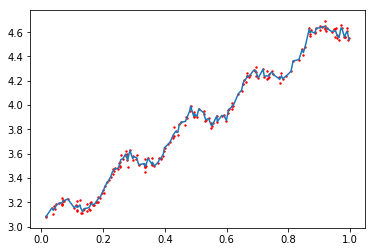

In [16]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(xSort[:,1], yHat[srtInd])
ax.scatter(xMat[:,1].flatten().A[0], mat(yArr).T.flatten().A[0], s = 2, c = 'red')
plt.show()

In [17]:
def rssError(yArr, yHatArr):
    return ((yArr - yHatArr) ** 2).sum()

In [18]:
abX, abY = loadDataSet('abalone.txt')
yHat01 = lwlrTest(abX[0:99], abX[0:99], abY[0:99], 0.1)
yHat1 = lwlrTest(abX[0:99], abX[0:99], abY[0:99], 1)
yHat10 = lwlrTest(abX[0:99], abX[0:99], abY[0:99], 10)

In [19]:
rssError(abY[:99], yHat01.T)

56.786912786991046

In [20]:
rssError(abY[:99], yHat1.T)

429.89056187022766

In [21]:
rssError(abY[:99], yHat10.T)

549.1181708825794

In [22]:
yHat01 = lwlrTest(abX[100:199], abX[0:99], abY[0:99], 0.1)
rssError(abY[100:199], yHat01.T)

67850.17021224099

In [23]:
yHat1 = lwlrTest(abX[100:199], abX[0:99], abY[0:99], 1)
rssError(abY[100:199], yHat1.T)

573.5261441897642

In [24]:
yHat10 = lwlrTest(abX[100:199], abX[0:99], abY[0:99], 10)
rssError(abY[100:199], yHat10.T)

517.5711905381531

In [25]:
ws = standRegres(abX[0:99], abY[0:99])

In [26]:
yHat = mat(abX[100:199]) * ws

In [27]:
rssError(abY[100:199], yHat.T.A)

518.6363153246336

In [28]:
def ridgeRegres(xMat, yMat, lam = 0.2):
    xTx = xMat.T * xMat
    denom = xTx + eye(shape(xMat)[1]) * lam
    if linalg.det(denom) == 0.0:
        print('This matrix is singular, cannot do inverse')
        return
    ws = denom.I * (xMat.T * yMat)
    return ws

In [29]:
yArr

[3.176513,
 3.816464,
 4.550095,
 4.256571,
 4.560815,
 3.929515,
 3.52617,
 3.156393,
 3.110301,
 3.149813,
 3.476346,
 4.119688,
 4.282233,
 3.486582,
 4.655492,
 3.965162,
 3.5149,
 3.125947,
 4.094115,
 3.476039,
 3.21061,
 3.190612,
 4.631504,
 4.29589,
 3.085028,
 3.44808,
 3.16744,
 3.364266,
 3.993482,
 3.891471,
 3.143259,
 3.114204,
 3.851484,
 4.621899,
 4.580768,
 3.620992,
 3.580501,
 4.618706,
 3.676867,
 4.641845,
 3.175939,
 4.26498,
 3.558448,
 3.436632,
 3.831052,
 3.182853,
 3.498906,
 3.946833,
 3.900583,
 4.238522,
 4.23308,
 3.521557,
 3.203344,
 4.278105,
 3.555705,
 3.502661,
 3.859776,
 4.275956,
 3.916191,
 3.587961,
 3.183004,
 4.225236,
 4.231083,
 4.240544,
 3.222372,
 4.021445,
 3.567479,
 3.56258,
 4.262059,
 3.208813,
 3.169825,
 4.193949,
 3.491678,
 4.533306,
 3.550108,
 4.636427,
 3.557078,
 3.552874,
 3.494159,
 3.206828,
 3.195266,
 4.221292,
 4.413372,
 4.184347,
 3.742878,
 3.201878,
 4.648964,
 3.510117,
 3.274434,
 3.579622,
 3.489244,
 4.237386

In [30]:
def ridgeTest(xArr, yArr):
    xMat = mat(xArr)
    yMat = mat(yArr).T
    yMean = mean(yMat, 0)
    yMat = yMat - yMean
    xMeans = mean(xMat, 0)
    xVar = var(xMat, 0)
    xMat = (xMat - xMeans) / xVar
    numTestPts = 30
    wMat = zeros((numTestPts, shape(xMat)[1]))
    for i in range(numTestPts):
        ws = ridgeRegres(xMat, yMat, exp(i - 10))
        wMat[i,:] = ws.T
    return wMat

In [31]:
abX, abY = loadDataSet('abalone.txt')

In [32]:
ridgeWeights = ridgeTest(abX, abY)

In [33]:
ridgeWeights

array([[ 4.30441949e-02, -2.27416346e-02,  1.32140875e-01,
         2.07518171e-02,  2.22403745e+00, -9.98952980e-01,
        -1.17254237e-01,  1.66229222e-01],
       [ 4.30441928e-02, -2.27416370e-02,  1.32140878e-01,
         2.07518175e-02,  2.22403626e+00, -9.98952746e-01,
        -1.17254174e-01,  1.66229339e-01],
       [ 4.30441874e-02, -2.27416435e-02,  1.32140885e-01,
         2.07518187e-02,  2.22403305e+00, -9.98952110e-01,
        -1.17254003e-01,  1.66229656e-01],
       [ 4.30441725e-02, -2.27416613e-02,  1.32140904e-01,
         2.07518218e-02,  2.22402431e+00, -9.98950381e-01,
        -1.17253537e-01,  1.66230518e-01],
       [ 4.30441321e-02, -2.27417096e-02,  1.32140956e-01,
         2.07518304e-02,  2.22400054e+00, -9.98945682e-01,
        -1.17252271e-01,  1.66232862e-01],
       [ 4.30440221e-02, -2.27418409e-02,  1.32141096e-01,
         2.07518537e-02,  2.22393595e+00, -9.98932910e-01,
        -1.17248829e-01,  1.66239232e-01],
       [ 4.30437233e-02, -2.274219

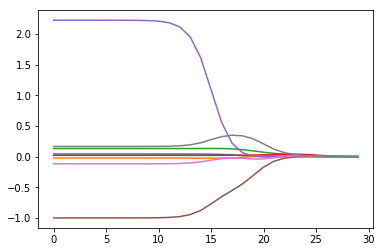

In [34]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(ridgeWeights)
plt.show()

In [35]:
xArr, yArr = loadDataSet('abalone.txt')

In [36]:
def regularize(xMat):#regularize by columns
    inMat = xMat.copy()
    inMeans = mean(inMat,0)   #calc mean then subtract it off
    inVar = var(inMat,0)      #calc variance of Xi then divide by it
    inMat = (inMat - inMeans)/inVar
    return inMat

def stageWise(xArr, yArr, eps = 0.01, numIt = 100):
    xMat = mat(xArr)
    yMat = mat(yArr).T
    yMean = mean(yMat, 0)
    yMat = yMat - yMean
    xMat = regularize(xMat)
    m, n = shape(xMat)
    ws = zeros((n, 1))
    wsTest = ws.copy()
    wsMax = ws.copy()
    returnMat=zeros((numIt,n))
    for i in range(numIt):
        print(ws.T)
        lowestError = float('inf')
        for j in range(n):
            for sign in [-1, 1]:
                wsTest = ws.copy()
                wsTest[j] += eps * sign
                yTest = xMat * wsTest
                rssE = rssError(yMat.A, yTest.A)
                if rssE < lowestError:
                    lowestError = rssE
                    wsMax = wsTest
        ws = wsMax.copy()
        returnMat[i,:] = ws.T
    return returnMat

In [37]:
stageWise(xArr, yArr, 0.001, 5000)

[[0. 0. 0. 0. 0. 0. 0. 0.]]
[[0.    0.    0.    0.001 0.    0.    0.    0.   ]]
[[0.    0.    0.    0.002 0.    0.    0.    0.   ]]
[[0.    0.    0.    0.003 0.    0.    0.    0.   ]]
[[0.    0.    0.    0.004 0.    0.    0.    0.   ]]
[[0.    0.    0.    0.005 0.    0.    0.    0.   ]]
[[0.    0.    0.    0.006 0.    0.    0.    0.   ]]
[[0.    0.    0.    0.007 0.    0.    0.    0.   ]]
[[0.    0.    0.    0.008 0.    0.    0.    0.   ]]
[[0.    0.    0.    0.009 0.    0.    0.    0.   ]]
[[0.   0.   0.   0.01 0.   0.   0.   0.  ]]
[[0.    0.    0.    0.011 0.    0.    0.    0.   ]]
[[0.    0.    0.    0.012 0.    0.    0.    0.   ]]
[[0.    0.    0.    0.013 0.    0.    0.    0.   ]]
[[0.    0.    0.    0.014 0.    0.    0.    0.   ]]
[[0.    0.    0.    0.015 0.    0.    0.    0.   ]]
[[0.    0.    0.    0.016 0.    0.    0.    0.   ]]
[[0.    0.    0.    0.017 0.    0.    0.    0.   ]]
[[0.    0.    0.    0.018 0.    0.    0.    0.   ]]
[[0.    0.    0.    0.019 0.    0.    0.    

[[ 0.     0.     0.005  0.045  0.    -0.033  0.     0.146]]
[[ 0.     0.     0.005  0.045  0.    -0.034  0.     0.146]]
[[ 0.     0.     0.005  0.045  0.    -0.035  0.     0.146]]
[[ 0.     0.     0.005  0.045  0.    -0.035  0.     0.147]]
[[ 0.     0.     0.005  0.045  0.    -0.036  0.     0.147]]
[[ 0.     0.     0.005  0.045  0.    -0.037  0.     0.147]]
[[ 0.     0.     0.005  0.045  0.    -0.037  0.     0.148]]
[[ 0.     0.     0.005  0.045  0.    -0.038  0.     0.148]]
[[ 0.     0.     0.005  0.045  0.    -0.038  0.     0.149]]
[[ 0.     0.     0.005  0.045  0.    -0.039  0.     0.149]]
[[ 0.     0.     0.005  0.045  0.    -0.04   0.     0.149]]
[[ 0.     0.     0.005  0.045  0.    -0.04   0.     0.15 ]]
[[ 0.     0.     0.005  0.045  0.    -0.041  0.     0.15 ]]
[[ 0.     0.     0.005  0.045  0.    -0.041  0.     0.151]]
[[ 0.     0.     0.005  0.045  0.    -0.042  0.     0.151]]
[[ 0.     0.     0.005  0.045  0.    -0.043  0.     0.151]]
[[ 0.     0.     0.005  0.045  0.    -0.

[[ 0.     0.     0.005  0.043  0.    -0.125  0.     0.207]]
[[ 0.     0.     0.005  0.043  0.    -0.126  0.     0.207]]
[[ 0.     0.     0.005  0.043  0.    -0.126  0.     0.208]]
[[ 0.     0.     0.005  0.043  0.    -0.127  0.     0.208]]
[[ 0.     0.     0.005  0.043  0.    -0.127  0.     0.209]]
[[ 0.     0.     0.005  0.042  0.    -0.127  0.     0.209]]
[[ 0.     0.     0.005  0.042  0.    -0.127  0.     0.21 ]]
[[ 0.     0.     0.005  0.042  0.    -0.127  0.     0.211]]
[[ 0.     0.     0.005  0.042  0.    -0.128  0.     0.211]]
[[ 0.     0.     0.005  0.042  0.    -0.128  0.     0.212]]
[[ 0.     0.     0.005  0.042  0.    -0.129  0.     0.212]]
[[ 0.     0.     0.005  0.042  0.    -0.129  0.     0.213]]
[[ 0.     0.     0.005  0.042  0.    -0.13   0.     0.213]]
[[ 0.     0.     0.005  0.042  0.    -0.131  0.     0.213]]
[[ 0.     0.     0.005  0.042  0.    -0.131  0.     0.214]]
[[ 0.     0.     0.005  0.042  0.    -0.132  0.     0.214]]
[[ 0.     0.     0.005  0.042  0.    -0.

[[ 0.     0.     0.023  0.039  0.    -0.204  0.     0.243]]
[[ 0.     0.     0.023  0.039  0.    -0.205  0.     0.243]]
[[ 0.     0.     0.023  0.039  0.    -0.206  0.     0.243]]
[[ 0.     0.     0.024  0.039  0.    -0.206  0.     0.243]]
[[ 0.     0.     0.024  0.039  0.    -0.207  0.     0.243]]
[[ 0.     0.     0.024  0.039  0.    -0.208  0.     0.243]]
[[ 0.     0.     0.024  0.039  0.    -0.208  0.     0.244]]
[[ 0.     0.     0.024  0.039  0.    -0.209  0.     0.244]]
[[ 0.     0.     0.024  0.039  0.    -0.209  0.     0.245]]
[[ 0.     0.     0.024  0.039  0.    -0.21   0.     0.245]]
[[ 0.     0.     0.024  0.039  0.    -0.211  0.     0.245]]
[[ 0.     0.     0.025  0.039  0.    -0.211  0.     0.245]]
[[ 0.     0.     0.025  0.039  0.    -0.212  0.     0.245]]
[[ 0.     0.     0.025  0.039  0.    -0.213  0.     0.245]]
[[ 0.     0.     0.025  0.039  0.    -0.213  0.     0.246]]
[[ 0.     0.     0.025  0.039  0.    -0.214  0.     0.246]]
[[ 0.     0.     0.025  0.039  0.    -0.

[[ 0.     0.     0.046  0.035  0.    -0.293  0.     0.277]]
[[ 0.     0.     0.046  0.035  0.    -0.293  0.     0.278]]
[[ 0.     0.     0.046  0.035  0.    -0.294  0.     0.278]]
[[ 0.     0.     0.046  0.035  0.    -0.295  0.     0.278]]
[[ 0.     0.     0.046  0.035  0.    -0.295  0.     0.279]]
[[ 0.     0.     0.046  0.035  0.    -0.296  0.     0.279]]
[[ 0.     0.     0.046  0.035  0.    -0.296  0.     0.28 ]]
[[ 0.     0.     0.046  0.035  0.    -0.297  0.     0.28 ]]
[[ 0.     0.     0.046  0.035  0.    -0.298  0.     0.28 ]]
[[ 0.     0.     0.047  0.035  0.    -0.298  0.     0.28 ]]
[[ 0.     0.     0.047  0.035  0.    -0.299  0.     0.28 ]]
[[ 0.     0.     0.047  0.035  0.    -0.3    0.     0.28 ]]
[[ 0.     0.     0.047  0.035  0.    -0.3    0.     0.281]]
[[ 0.     0.     0.047  0.035  0.    -0.301  0.     0.281]]
[[ 0.     0.     0.047  0.035  0.    -0.302  0.     0.281]]
[[ 0.     0.     0.048  0.035  0.    -0.302  0.     0.281]]
[[ 0.     0.     0.048  0.035  0.    -0.

[[ 0.     0.     0.08   0.029  0.    -0.428  0.     0.331]]
[[ 0.     0.     0.08   0.029  0.    -0.428  0.     0.332]]
[[ 0.     0.     0.08   0.029  0.    -0.429  0.     0.332]]
[[ 0.     0.     0.08   0.029  0.    -0.43   0.     0.332]]
[[ 0.     0.     0.081  0.029  0.    -0.43   0.     0.332]]
[[ 0.     0.     0.081  0.029  0.    -0.431  0.     0.332]]
[[ 0.     0.     0.081  0.029  0.    -0.432  0.     0.332]]
[[ 0.     0.     0.081  0.029  0.    -0.432  0.     0.333]]
[[ 0.     0.     0.081  0.029  0.    -0.433  0.     0.333]]
[[ 0.     0.     0.081  0.029  0.    -0.433  0.     0.334]]
[[ 0.     0.     0.081  0.028  0.    -0.433  0.     0.334]]
[[ 0.     0.     0.082  0.028  0.    -0.433  0.     0.334]]
[[ 0.     0.     0.082  0.028  0.    -0.433  0.     0.335]]
[[ 0.     0.     0.082  0.028  0.    -0.434  0.     0.335]]
[[ 0.     0.     0.082  0.028  0.    -0.434  0.     0.336]]
[[ 0.     0.     0.082  0.028  0.    -0.435  0.     0.336]]
[[ 0.     0.     0.082  0.028  0.    -0.

[[ 0.     0.     0.109  0.023  0.069 -0.564  0.     0.374]]
[[ 0.     0.     0.109  0.023  0.069 -0.565  0.     0.374]]
[[ 0.     0.     0.109  0.023  0.07  -0.565  0.     0.374]]
[[ 0.     0.     0.109  0.023  0.071 -0.565  0.     0.374]]
[[ 0.     0.     0.109  0.023  0.071 -0.566  0.     0.374]]
[[ 0.     0.     0.109  0.023  0.072 -0.566  0.     0.374]]
[[ 0.     0.     0.109  0.023  0.073 -0.566  0.     0.374]]
[[ 0.     0.     0.109  0.023  0.073 -0.567  0.     0.374]]
[[ 0.     0.     0.109  0.023  0.074 -0.567  0.     0.374]]
[[ 0.     0.     0.109  0.023  0.075 -0.567  0.     0.374]]
[[ 0.     0.     0.109  0.023  0.076 -0.567  0.     0.374]]
[[ 0.     0.     0.109  0.023  0.076 -0.568  0.     0.374]]
[[ 0.     0.     0.109  0.023  0.077 -0.568  0.     0.374]]
[[ 0.     0.     0.109  0.023  0.078 -0.568  0.     0.374]]
[[ 0.     0.     0.109  0.023  0.078 -0.569  0.     0.374]]
[[ 0.     0.     0.109  0.023  0.079 -0.569  0.     0.374]]
[[ 0.     0.     0.109  0.023  0.08  -0.

[[ 0.006  0.     0.11   0.022  0.239 -0.609 -0.011  0.368]]
[[ 0.006  0.     0.11   0.022  0.24  -0.609 -0.011  0.368]]
[[ 0.006  0.     0.11   0.022  0.241 -0.609 -0.011  0.368]]
[[ 0.006  0.     0.11   0.022  0.241 -0.609 -0.011  0.367]]
[[ 0.006  0.     0.11   0.022  0.242 -0.609 -0.011  0.367]]
[[ 0.006  0.     0.11   0.022  0.243 -0.609 -0.011  0.367]]
[[ 0.006  0.     0.11   0.022  0.244 -0.609 -0.011  0.367]]
[[ 0.006  0.     0.11   0.022  0.245 -0.609 -0.011  0.367]]
[[ 0.006  0.     0.11   0.022  0.245 -0.609 -0.012  0.367]]
[[ 0.006  0.     0.11   0.022  0.246 -0.609 -0.012  0.367]]
[[ 0.006  0.     0.11   0.022  0.247 -0.609 -0.012  0.367]]
[[ 0.006  0.     0.11   0.022  0.248 -0.609 -0.012  0.367]]
[[ 0.006  0.     0.11   0.022  0.249 -0.609 -0.012  0.367]]
[[ 0.006  0.     0.11   0.022  0.249 -0.61  -0.012  0.367]]
[[ 0.006  0.     0.11   0.022  0.25  -0.61  -0.012  0.367]]
[[ 0.006  0.     0.11   0.022  0.251 -0.61  -0.012  0.367]]
[[ 0.006  0.     0.11   0.022  0.251 -0.

[[ 0.011  0.     0.11   0.022  0.444 -0.648 -0.022  0.347]]
[[ 0.011  0.     0.11   0.022  0.444 -0.649 -0.022  0.347]]
[[ 0.011  0.     0.11   0.022  0.445 -0.649 -0.022  0.347]]
[[ 0.011  0.     0.11   0.022  0.446 -0.649 -0.022  0.347]]
[[ 0.011  0.     0.11   0.022  0.447 -0.649 -0.022  0.347]]
[[ 0.011  0.     0.11   0.022  0.447 -0.649 -0.023  0.347]]
[[ 0.011  0.     0.11   0.022  0.448 -0.649 -0.023  0.347]]
[[ 0.011  0.     0.11   0.022  0.449 -0.649 -0.023  0.347]]
[[ 0.011  0.     0.11   0.022  0.45  -0.649 -0.023  0.347]]
[[ 0.011  0.     0.11   0.022  0.451 -0.649 -0.023  0.347]]
[[ 0.011  0.     0.11   0.022  0.451 -0.65  -0.023  0.347]]
[[ 0.011  0.     0.11   0.022  0.452 -0.65  -0.023  0.347]]
[[ 0.011  0.     0.11   0.022  0.453 -0.65  -0.023  0.347]]
[[ 0.011  0.     0.11   0.022  0.453 -0.65  -0.023  0.346]]
[[ 0.011  0.     0.11   0.022  0.454 -0.65  -0.023  0.346]]
[[ 0.011  0.     0.11   0.022  0.455 -0.65  -0.023  0.346]]
[[ 0.011  0.     0.11   0.022  0.456 -0.

[[ 0.012  0.     0.11   0.022  0.555 -0.67  -0.028  0.336]]
[[ 0.012  0.     0.11   0.022  0.555 -0.671 -0.028  0.336]]
[[ 0.012  0.     0.11   0.022  0.556 -0.671 -0.028  0.336]]
[[ 0.012  0.     0.11   0.022  0.557 -0.671 -0.028  0.336]]
[[ 0.013  0.     0.11   0.022  0.557 -0.671 -0.028  0.336]]
[[ 0.013  0.     0.11   0.022  0.558 -0.671 -0.028  0.336]]
[[ 0.013  0.     0.11   0.022  0.558 -0.671 -0.029  0.336]]
[[ 0.013  0.     0.11   0.022  0.559 -0.671 -0.029  0.336]]
[[ 0.013  0.     0.11   0.022  0.56  -0.671 -0.029  0.336]]
[[ 0.013  0.     0.11   0.022  0.561 -0.671 -0.029  0.336]]
[[ 0.013  0.     0.11   0.022  0.562 -0.671 -0.029  0.336]]
[[ 0.013  0.     0.11   0.022  0.562 -0.671 -0.029  0.335]]
[[ 0.013  0.     0.11   0.022  0.563 -0.671 -0.029  0.335]]
[[ 0.013  0.     0.11   0.022  0.564 -0.671 -0.029  0.335]]
[[ 0.013  0.     0.11   0.022  0.565 -0.671 -0.029  0.335]]
[[ 0.013  0.     0.11   0.022  0.565 -0.672 -0.029  0.335]]
[[ 0.013  0.     0.11   0.022  0.566 -0.

[[ 0.017  0.     0.11   0.022  0.737 -0.708 -0.037  0.318]]
[[ 0.017  0.     0.11   0.022  0.738 -0.708 -0.037  0.318]]
[[ 0.017  0.     0.11   0.022  0.738 -0.708 -0.038  0.318]]
[[ 0.017  0.     0.11   0.022  0.739 -0.708 -0.038  0.318]]
[[ 0.017  0.     0.11   0.022  0.74  -0.708 -0.038  0.318]]
[[ 0.017  0.     0.11   0.022  0.741 -0.708 -0.038  0.318]]
[[ 0.017  0.     0.11   0.022  0.742 -0.708 -0.038  0.318]]
[[ 0.017  0.     0.11   0.022  0.742 -0.708 -0.038  0.317]]
[[ 0.017  0.     0.11   0.022  0.743 -0.708 -0.038  0.317]]
[[ 0.017  0.     0.11   0.022  0.744 -0.708 -0.038  0.317]]
[[ 0.017  0.     0.11   0.022  0.745 -0.708 -0.038  0.317]]
[[ 0.017  0.     0.11   0.022  0.745 -0.709 -0.038  0.317]]
[[ 0.017  0.     0.11   0.022  0.746 -0.709 -0.038  0.317]]
[[ 0.017  0.     0.11   0.022  0.747 -0.709 -0.038  0.317]]
[[ 0.017  0.     0.11   0.022  0.747 -0.71  -0.038  0.317]]
[[ 0.017  0.     0.11   0.022  0.748 -0.71  -0.038  0.317]]
[[ 0.017  0.     0.11   0.022  0.749 -0.

[[ 0.019  0.     0.11   0.022  0.839 -0.727 -0.043  0.307]]
[[ 0.019  0.     0.11   0.022  0.84  -0.727 -0.043  0.307]]
[[ 0.019  0.     0.11   0.022  0.841 -0.727 -0.043  0.307]]
[[ 0.019  0.     0.11   0.022  0.842 -0.727 -0.043  0.307]]
[[ 0.019  0.     0.11   0.022  0.842 -0.728 -0.043  0.307]]
[[ 0.019  0.     0.11   0.022  0.843 -0.728 -0.043  0.307]]
[[ 0.019  0.     0.11   0.022  0.844 -0.728 -0.043  0.307]]
[[ 0.019  0.     0.11   0.022  0.844 -0.729 -0.043  0.307]]
[[ 0.019  0.     0.11   0.022  0.845 -0.729 -0.043  0.307]]
[[ 0.019  0.     0.11   0.022  0.846 -0.729 -0.043  0.307]]
[[ 0.019  0.     0.11   0.022  0.846 -0.73  -0.043  0.307]]
[[ 0.019  0.     0.11   0.022  0.847 -0.73  -0.043  0.307]]
[[ 0.019  0.     0.11   0.022  0.848 -0.73  -0.043  0.307]]
[[ 0.019  0.     0.11   0.022  0.848 -0.73  -0.043  0.306]]
[[ 0.019  0.     0.11   0.022  0.849 -0.73  -0.043  0.306]]
[[ 0.019  0.     0.11   0.022  0.85  -0.73  -0.043  0.306]]
[[ 0.019  0.     0.11   0.022  0.851 -0.

[[ 0.02   0.     0.11   0.022  0.945 -0.748 -0.049  0.297]]
[[ 0.02   0.     0.11   0.022  0.946 -0.748 -0.049  0.297]]
[[ 0.02   0.     0.11   0.022  0.947 -0.748 -0.049  0.297]]
[[ 0.02   0.     0.11   0.022  0.947 -0.749 -0.049  0.297]]
[[ 0.02   0.     0.11   0.022  0.948 -0.749 -0.049  0.297]]
[[ 0.02   0.     0.11   0.022  0.949 -0.749 -0.049  0.297]]
[[ 0.02   0.     0.11   0.022  0.949 -0.749 -0.049  0.296]]
[[ 0.02   0.     0.11   0.022  0.95  -0.749 -0.049  0.296]]
[[ 0.02   0.     0.11   0.022  0.951 -0.749 -0.049  0.296]]
[[ 0.02   0.     0.11   0.022  0.952 -0.749 -0.049  0.296]]
[[ 0.021  0.     0.11   0.022  0.952 -0.749 -0.049  0.296]]
[[ 0.021  0.     0.11   0.022  0.953 -0.749 -0.049  0.296]]
[[ 0.021  0.     0.11   0.022  0.953 -0.75  -0.049  0.296]]
[[ 0.021  0.     0.11   0.022  0.954 -0.75  -0.049  0.296]]
[[ 0.021  0.     0.11   0.022  0.955 -0.75  -0.049  0.296]]
[[ 0.021  0.     0.11   0.022  0.955 -0.751 -0.049  0.296]]
[[ 0.021  0.     0.11   0.022  0.956 -0.

[[ 0.025  0.     0.11   0.022  1.153 -0.789 -0.06   0.276]]
[[ 0.025  0.     0.11   0.022  1.154 -0.789 -0.06   0.276]]
[[ 0.025  0.     0.11   0.022  1.155 -0.789 -0.06   0.276]]
[[ 0.025  0.     0.11   0.022  1.155 -0.789 -0.06   0.275]]
[[ 0.025  0.     0.11   0.022  1.156 -0.789 -0.06   0.275]]
[[ 0.025  0.     0.11   0.022  1.157 -0.789 -0.06   0.275]]
[[ 0.025  0.     0.11   0.022  1.158 -0.789 -0.06   0.275]]
[[ 0.025  0.     0.11   0.022  1.158 -0.79  -0.06   0.275]]
[[ 0.025  0.     0.11   0.022  1.159 -0.79  -0.06   0.275]]
[[ 0.025  0.     0.11   0.022  1.16  -0.79  -0.06   0.275]]
[[ 0.025  0.     0.11   0.022  1.16  -0.791 -0.06   0.275]]
[[ 0.025  0.     0.11   0.022  1.161 -0.791 -0.06   0.275]]
[[ 0.025  0.     0.11   0.022  1.162 -0.791 -0.06   0.275]]
[[ 0.025  0.     0.11   0.022  1.162 -0.792 -0.06   0.275]]
[[ 0.025  0.     0.11   0.022  1.163 -0.792 -0.06   0.275]]
[[ 0.025  0.     0.11   0.022  1.164 -0.792 -0.06   0.275]]
[[ 0.025  0.     0.11   0.022  1.165 -0.

[[ 0.028  0.     0.11   0.022  1.263 -0.812 -0.065  0.265]]
[[ 0.028  0.     0.11   0.022  1.263 -0.813 -0.065  0.265]]
[[ 0.028  0.     0.11   0.022  1.264 -0.813 -0.065  0.265]]
[[ 0.028  0.     0.11   0.022  1.265 -0.813 -0.065  0.265]]
[[ 0.028  0.     0.11   0.022  1.266 -0.813 -0.065  0.265]]
[[ 0.028  0.     0.11   0.022  1.266 -0.813 -0.065  0.264]]
[[ 0.028  0.     0.11   0.022  1.267 -0.813 -0.065  0.264]]
[[ 0.028  0.     0.11   0.022  1.268 -0.813 -0.065  0.264]]
[[ 0.028  0.     0.11   0.022  1.269 -0.813 -0.065  0.264]]
[[ 0.028  0.     0.11   0.022  1.269 -0.813 -0.066  0.264]]
[[ 0.028  0.     0.11   0.022  1.27  -0.813 -0.066  0.264]]
[[ 0.028  0.     0.11   0.022  1.271 -0.813 -0.066  0.264]]
[[ 0.028  0.     0.11   0.022  1.272 -0.813 -0.066  0.264]]
[[ 0.028  0.     0.11   0.022  1.273 -0.813 -0.066  0.264]]
[[ 0.028  0.     0.11   0.022  1.273 -0.814 -0.066  0.264]]
[[ 0.028  0.     0.11   0.022  1.274 -0.814 -0.066  0.264]]
[[ 0.028  0.     0.11   0.022  1.275 -0.

[[ 0.032  0.     0.111  0.022  1.459 -0.851 -0.076  0.245]]
[[ 0.032  0.     0.111  0.022  1.459 -0.851 -0.076  0.244]]
[[ 0.032  0.     0.111  0.022  1.46  -0.851 -0.076  0.244]]
[[ 0.032  0.     0.111  0.022  1.461 -0.851 -0.076  0.244]]
[[ 0.032  0.     0.111  0.022  1.462 -0.851 -0.076  0.244]]
[[ 0.032  0.     0.111  0.022  1.462 -0.852 -0.076  0.244]]
[[ 0.032  0.     0.111  0.022  1.463 -0.852 -0.076  0.244]]
[[ 0.032  0.     0.111  0.022  1.464 -0.852 -0.076  0.244]]
[[ 0.032  0.     0.111  0.022  1.464 -0.853 -0.076  0.244]]
[[ 0.032  0.     0.111  0.022  1.465 -0.853 -0.076  0.244]]
[[ 0.032  0.     0.111  0.022  1.466 -0.853 -0.076  0.244]]
[[ 0.032  0.     0.111  0.022  1.466 -0.853 -0.076  0.243]]
[[ 0.032  0.     0.111  0.022  1.467 -0.853 -0.076  0.243]]
[[ 0.032  0.     0.111  0.022  1.468 -0.853 -0.076  0.243]]
[[ 0.032  0.     0.111  0.022  1.469 -0.853 -0.076  0.243]]
[[ 0.032  0.     0.111  0.022  1.47  -0.853 -0.076  0.243]]
[[ 0.032  0.     0.111  0.022  1.47  -0.

[[ 0.034 -0.003  0.113  0.022  1.57  -0.872 -0.082  0.233]]
[[ 0.034 -0.003  0.113  0.022  1.571 -0.872 -0.082  0.233]]
[[ 0.034 -0.003  0.113  0.022  1.572 -0.872 -0.082  0.233]]
[[ 0.034 -0.003  0.113  0.022  1.573 -0.872 -0.082  0.233]]
[[ 0.034 -0.003  0.113  0.022  1.573 -0.873 -0.082  0.233]]
[[ 0.034 -0.003  0.113  0.022  1.574 -0.873 -0.082  0.233]]
[[ 0.034 -0.003  0.113  0.022  1.575 -0.873 -0.082  0.233]]
[[ 0.034 -0.003  0.113  0.022  1.575 -0.874 -0.082  0.233]]
[[ 0.034 -0.003  0.113  0.022  1.576 -0.874 -0.082  0.233]]
[[ 0.034 -0.003  0.113  0.022  1.577 -0.874 -0.082  0.233]]
[[ 0.034 -0.003  0.113  0.022  1.577 -0.874 -0.082  0.232]]
[[ 0.034 -0.003  0.113  0.022  1.578 -0.874 -0.082  0.232]]
[[ 0.034 -0.003  0.113  0.022  1.579 -0.874 -0.082  0.232]]
[[ 0.034 -0.003  0.113  0.022  1.58  -0.874 -0.082  0.232]]
[[ 0.034 -0.003  0.113  0.022  1.58  -0.875 -0.082  0.232]]
[[ 0.034 -0.003  0.113  0.022  1.581 -0.875 -0.082  0.232]]
[[ 0.034 -0.003  0.113  0.022  1.582 -0.

[[ 0.036 -0.003  0.113  0.022  1.676 -0.893 -0.087  0.222]]
[[ 0.036 -0.003  0.113  0.022  1.677 -0.893 -0.087  0.222]]
[[ 0.036 -0.003  0.113  0.022  1.677 -0.894 -0.087  0.222]]
[[ 0.036 -0.003  0.113  0.022  1.678 -0.894 -0.087  0.222]]
[[ 0.036 -0.003  0.113  0.022  1.679 -0.894 -0.087  0.222]]
[[ 0.036 -0.003  0.113  0.022  1.679 -0.895 -0.087  0.222]]
[[ 0.036 -0.003  0.113  0.022  1.68  -0.895 -0.087  0.222]]
[[ 0.036 -0.003  0.113  0.022  1.681 -0.895 -0.087  0.222]]
[[ 0.036 -0.003  0.113  0.022  1.682 -0.895 -0.087  0.222]]
[[ 0.036 -0.003  0.113  0.022  1.682 -0.895 -0.088  0.222]]
[[ 0.036 -0.003  0.113  0.022  1.683 -0.895 -0.088  0.222]]
[[ 0.036 -0.003  0.113  0.022  1.684 -0.895 -0.088  0.222]]
[[ 0.036 -0.003  0.113  0.022  1.685 -0.895 -0.088  0.222]]
[[ 0.036 -0.003  0.113  0.022  1.686 -0.895 -0.088  0.222]]
[[ 0.036 -0.003  0.113  0.022  1.686 -0.895 -0.088  0.221]]
[[ 0.036 -0.003  0.113  0.022  1.687 -0.895 -0.088  0.221]]
[[ 0.036 -0.003  0.113  0.022  1.688 -0.

[[ 0.038 -0.006  0.116  0.022  1.77  -0.913 -0.092  0.212]]
[[ 0.038 -0.006  0.116  0.022  1.771 -0.913 -0.092  0.212]]
[[ 0.038 -0.006  0.116  0.022  1.772 -0.913 -0.092  0.212]]
[[ 0.038 -0.006  0.116  0.022  1.773 -0.913 -0.092  0.212]]
[[ 0.038 -0.006  0.116  0.022  1.774 -0.913 -0.092  0.212]]
[[ 0.038 -0.006  0.116  0.022  1.774 -0.913 -0.093  0.212]]
[[ 0.038 -0.006  0.116  0.022  1.775 -0.913 -0.093  0.212]]
[[ 0.038 -0.006  0.116  0.022  1.776 -0.913 -0.093  0.212]]
[[ 0.038 -0.006  0.116  0.022  1.777 -0.913 -0.093  0.212]]
[[ 0.038 -0.006  0.116  0.022  1.778 -0.913 -0.093  0.212]]
[[ 0.038 -0.006  0.116  0.022  1.778 -0.914 -0.093  0.212]]
[[ 0.038 -0.006  0.116  0.022  1.779 -0.914 -0.093  0.212]]
[[ 0.038 -0.006  0.116  0.022  1.78  -0.914 -0.093  0.212]]
[[ 0.038 -0.006  0.116  0.022  1.78  -0.915 -0.093  0.212]]
[[ 0.038 -0.006  0.116  0.022  1.781 -0.915 -0.093  0.212]]
[[ 0.038 -0.006  0.116  0.022  1.782 -0.915 -0.093  0.212]]
[[ 0.038 -0.006  0.116  0.022  1.782 -0.

[[ 0.04  -0.007  0.117  0.022  1.883 -0.935 -0.098  0.201]]
[[ 0.04  -0.007  0.117  0.022  1.884 -0.935 -0.098  0.201]]
[[ 0.04  -0.007  0.117  0.022  1.884 -0.935 -0.099  0.201]]
[[ 0.04  -0.007  0.117  0.022  1.885 -0.935 -0.099  0.201]]
[[ 0.04  -0.007  0.117  0.022  1.886 -0.935 -0.099  0.201]]
[[ 0.04  -0.007  0.117  0.022  1.887 -0.935 -0.099  0.201]]
[[ 0.04  -0.007  0.117  0.022  1.888 -0.935 -0.099  0.201]]
[[ 0.04  -0.007  0.117  0.022  1.888 -0.936 -0.099  0.201]]
[[ 0.04  -0.007  0.117  0.022  1.889 -0.936 -0.099  0.201]]
[[ 0.04  -0.007  0.117  0.022  1.89  -0.936 -0.099  0.201]]
[[ 0.04  -0.007  0.117  0.022  1.89  -0.936 -0.099  0.2  ]]
[[ 0.04  -0.007  0.117  0.022  1.891 -0.936 -0.099  0.2  ]]
[[ 0.04  -0.007  0.117  0.022  1.892 -0.936 -0.099  0.2  ]]
[[ 0.04  -0.007  0.117  0.022  1.893 -0.936 -0.099  0.2  ]]
[[ 0.04  -0.007  0.117  0.022  1.893 -0.937 -0.099  0.2  ]]
[[ 0.04  -0.007  0.117  0.022  1.894 -0.937 -0.099  0.2  ]]
[[ 0.04  -0.007  0.117  0.022  1.895 -0.

[[ 0.043 -0.009  0.119  0.022  1.992 -0.956 -0.104  0.19 ]]
[[ 0.043 -0.01   0.119  0.022  1.992 -0.956 -0.104  0.19 ]]
[[ 0.043 -0.01   0.119  0.022  1.993 -0.956 -0.104  0.19 ]]
[[ 0.043 -0.01   0.119  0.022  1.994 -0.956 -0.104  0.19 ]]
[[ 0.043 -0.01   0.119  0.022  1.995 -0.956 -0.104  0.19 ]]
[[ 0.043 -0.01   0.119  0.022  1.995 -0.956 -0.104  0.189]]
[[ 0.043 -0.01   0.119  0.022  1.996 -0.956 -0.104  0.189]]
[[ 0.043 -0.01   0.119  0.022  1.997 -0.956 -0.104  0.189]]
[[ 0.043 -0.01   0.119  0.022  1.998 -0.956 -0.104  0.189]]
[[ 0.043 -0.01   0.119  0.022  1.998 -0.957 -0.104  0.189]]
[[ 0.043 -0.01   0.119  0.022  1.999 -0.957 -0.104  0.189]]
[[ 0.043 -0.01   0.119  0.022  2.    -0.957 -0.104  0.189]]
[[ 0.043 -0.01   0.119  0.022  2.    -0.958 -0.104  0.189]]
[[ 0.043 -0.01   0.119  0.022  2.001 -0.958 -0.104  0.189]]
[[ 0.043 -0.01   0.119  0.022  2.002 -0.958 -0.104  0.189]]
[[ 0.043 -0.01   0.119  0.022  2.002 -0.959 -0.104  0.189]]
[[ 0.043 -0.01   0.119  0.022  2.003 -0.

[[ 0.043 -0.011  0.12   0.022  2.023 -0.963 -0.105  0.187]]
[[ 0.044 -0.011  0.12   0.022  2.023 -0.963 -0.105  0.187]]
[[ 0.043 -0.011  0.12   0.022  2.023 -0.963 -0.105  0.187]]
[[ 0.044 -0.011  0.12   0.022  2.023 -0.963 -0.105  0.187]]
[[ 0.043 -0.011  0.12   0.022  2.023 -0.963 -0.105  0.187]]
[[ 0.044 -0.011  0.12   0.022  2.023 -0.963 -0.105  0.187]]
[[ 0.043 -0.011  0.12   0.022  2.023 -0.963 -0.105  0.187]]
[[ 0.044 -0.011  0.12   0.022  2.023 -0.963 -0.105  0.187]]
[[ 0.043 -0.011  0.12   0.022  2.023 -0.963 -0.105  0.187]]
[[ 0.044 -0.011  0.12   0.022  2.023 -0.963 -0.105  0.187]]
[[ 0.043 -0.011  0.12   0.022  2.023 -0.963 -0.105  0.187]]
[[ 0.044 -0.011  0.12   0.022  2.023 -0.963 -0.105  0.187]]
[[ 0.043 -0.011  0.12   0.022  2.023 -0.963 -0.105  0.187]]
[[ 0.044 -0.011  0.12   0.022  2.023 -0.963 -0.105  0.187]]
[[ 0.043 -0.011  0.12   0.022  2.023 -0.963 -0.105  0.187]]
[[ 0.044 -0.011  0.12   0.022  2.023 -0.963 -0.105  0.187]]
[[ 0.043 -0.011  0.12   0.022  2.023 -0.

[[ 0.043 -0.011  0.12   0.022  2.023 -0.963 -0.105  0.187]]
[[ 0.044 -0.011  0.12   0.022  2.023 -0.963 -0.105  0.187]]
[[ 0.043 -0.011  0.12   0.022  2.023 -0.963 -0.105  0.187]]
[[ 0.044 -0.011  0.12   0.022  2.023 -0.963 -0.105  0.187]]
[[ 0.043 -0.011  0.12   0.022  2.023 -0.963 -0.105  0.187]]
[[ 0.044 -0.011  0.12   0.022  2.023 -0.963 -0.105  0.187]]
[[ 0.043 -0.011  0.12   0.022  2.023 -0.963 -0.105  0.187]]
[[ 0.044 -0.011  0.12   0.022  2.023 -0.963 -0.105  0.187]]
[[ 0.043 -0.011  0.12   0.022  2.023 -0.963 -0.105  0.187]]
[[ 0.044 -0.011  0.12   0.022  2.023 -0.963 -0.105  0.187]]
[[ 0.043 -0.011  0.12   0.022  2.023 -0.963 -0.105  0.187]]
[[ 0.044 -0.011  0.12   0.022  2.023 -0.963 -0.105  0.187]]
[[ 0.043 -0.011  0.12   0.022  2.023 -0.963 -0.105  0.187]]
[[ 0.044 -0.011  0.12   0.022  2.023 -0.963 -0.105  0.187]]
[[ 0.043 -0.011  0.12   0.022  2.023 -0.963 -0.105  0.187]]
[[ 0.044 -0.011  0.12   0.022  2.023 -0.963 -0.105  0.187]]
[[ 0.043 -0.011  0.12   0.022  2.023 -0.

[[ 0.044 -0.011  0.12   0.022  2.023 -0.963 -0.105  0.187]]
[[ 0.043 -0.011  0.12   0.022  2.023 -0.963 -0.105  0.187]]
[[ 0.044 -0.011  0.12   0.022  2.023 -0.963 -0.105  0.187]]
[[ 0.043 -0.011  0.12   0.022  2.023 -0.963 -0.105  0.187]]
[[ 0.044 -0.011  0.12   0.022  2.023 -0.963 -0.105  0.187]]
[[ 0.043 -0.011  0.12   0.022  2.023 -0.963 -0.105  0.187]]
[[ 0.044 -0.011  0.12   0.022  2.023 -0.963 -0.105  0.187]]
[[ 0.043 -0.011  0.12   0.022  2.023 -0.963 -0.105  0.187]]
[[ 0.044 -0.011  0.12   0.022  2.023 -0.963 -0.105  0.187]]
[[ 0.043 -0.011  0.12   0.022  2.023 -0.963 -0.105  0.187]]
[[ 0.044 -0.011  0.12   0.022  2.023 -0.963 -0.105  0.187]]
[[ 0.043 -0.011  0.12   0.022  2.023 -0.963 -0.105  0.187]]
[[ 0.044 -0.011  0.12   0.022  2.023 -0.963 -0.105  0.187]]
[[ 0.043 -0.011  0.12   0.022  2.023 -0.963 -0.105  0.187]]
[[ 0.044 -0.011  0.12   0.022  2.023 -0.963 -0.105  0.187]]
[[ 0.043 -0.011  0.12   0.022  2.023 -0.963 -0.105  0.187]]
[[ 0.044 -0.011  0.12   0.022  2.023 -0.

[[ 0.043 -0.011  0.12   0.022  2.023 -0.963 -0.105  0.187]]
[[ 0.044 -0.011  0.12   0.022  2.023 -0.963 -0.105  0.187]]
[[ 0.043 -0.011  0.12   0.022  2.023 -0.963 -0.105  0.187]]
[[ 0.044 -0.011  0.12   0.022  2.023 -0.963 -0.105  0.187]]
[[ 0.043 -0.011  0.12   0.022  2.023 -0.963 -0.105  0.187]]
[[ 0.044 -0.011  0.12   0.022  2.023 -0.963 -0.105  0.187]]
[[ 0.043 -0.011  0.12   0.022  2.023 -0.963 -0.105  0.187]]
[[ 0.044 -0.011  0.12   0.022  2.023 -0.963 -0.105  0.187]]
[[ 0.043 -0.011  0.12   0.022  2.023 -0.963 -0.105  0.187]]
[[ 0.044 -0.011  0.12   0.022  2.023 -0.963 -0.105  0.187]]
[[ 0.043 -0.011  0.12   0.022  2.023 -0.963 -0.105  0.187]]
[[ 0.044 -0.011  0.12   0.022  2.023 -0.963 -0.105  0.187]]
[[ 0.043 -0.011  0.12   0.022  2.023 -0.963 -0.105  0.187]]
[[ 0.044 -0.011  0.12   0.022  2.023 -0.963 -0.105  0.187]]
[[ 0.043 -0.011  0.12   0.022  2.023 -0.963 -0.105  0.187]]
[[ 0.044 -0.011  0.12   0.022  2.023 -0.963 -0.105  0.187]]
[[ 0.043 -0.011  0.12   0.022  2.023 -0.

[[ 0.044 -0.011  0.12   0.022  2.023 -0.963 -0.105  0.187]]
[[ 0.043 -0.011  0.12   0.022  2.023 -0.963 -0.105  0.187]]
[[ 0.044 -0.011  0.12   0.022  2.023 -0.963 -0.105  0.187]]
[[ 0.043 -0.011  0.12   0.022  2.023 -0.963 -0.105  0.187]]
[[ 0.044 -0.011  0.12   0.022  2.023 -0.963 -0.105  0.187]]
[[ 0.043 -0.011  0.12   0.022  2.023 -0.963 -0.105  0.187]]
[[ 0.044 -0.011  0.12   0.022  2.023 -0.963 -0.105  0.187]]
[[ 0.043 -0.011  0.12   0.022  2.023 -0.963 -0.105  0.187]]
[[ 0.044 -0.011  0.12   0.022  2.023 -0.963 -0.105  0.187]]
[[ 0.043 -0.011  0.12   0.022  2.023 -0.963 -0.105  0.187]]
[[ 0.044 -0.011  0.12   0.022  2.023 -0.963 -0.105  0.187]]
[[ 0.043 -0.011  0.12   0.022  2.023 -0.963 -0.105  0.187]]
[[ 0.044 -0.011  0.12   0.022  2.023 -0.963 -0.105  0.187]]
[[ 0.043 -0.011  0.12   0.022  2.023 -0.963 -0.105  0.187]]
[[ 0.044 -0.011  0.12   0.022  2.023 -0.963 -0.105  0.187]]
[[ 0.043 -0.011  0.12   0.022  2.023 -0.963 -0.105  0.187]]
[[ 0.044 -0.011  0.12   0.022  2.023 -0.

[[ 0.043 -0.011  0.12   0.022  2.023 -0.963 -0.105  0.187]]
[[ 0.044 -0.011  0.12   0.022  2.023 -0.963 -0.105  0.187]]
[[ 0.043 -0.011  0.12   0.022  2.023 -0.963 -0.105  0.187]]
[[ 0.044 -0.011  0.12   0.022  2.023 -0.963 -0.105  0.187]]
[[ 0.043 -0.011  0.12   0.022  2.023 -0.963 -0.105  0.187]]
[[ 0.044 -0.011  0.12   0.022  2.023 -0.963 -0.105  0.187]]
[[ 0.043 -0.011  0.12   0.022  2.023 -0.963 -0.105  0.187]]
[[ 0.044 -0.011  0.12   0.022  2.023 -0.963 -0.105  0.187]]
[[ 0.043 -0.011  0.12   0.022  2.023 -0.963 -0.105  0.187]]
[[ 0.044 -0.011  0.12   0.022  2.023 -0.963 -0.105  0.187]]
[[ 0.043 -0.011  0.12   0.022  2.023 -0.963 -0.105  0.187]]
[[ 0.044 -0.011  0.12   0.022  2.023 -0.963 -0.105  0.187]]
[[ 0.043 -0.011  0.12   0.022  2.023 -0.963 -0.105  0.187]]
[[ 0.044 -0.011  0.12   0.022  2.023 -0.963 -0.105  0.187]]
[[ 0.043 -0.011  0.12   0.022  2.023 -0.963 -0.105  0.187]]
[[ 0.044 -0.011  0.12   0.022  2.023 -0.963 -0.105  0.187]]
[[ 0.043 -0.011  0.12   0.022  2.023 -0.

[[ 0.043 -0.011  0.12   0.022  2.023 -0.963 -0.105  0.187]]
[[ 0.044 -0.011  0.12   0.022  2.023 -0.963 -0.105  0.187]]
[[ 0.043 -0.011  0.12   0.022  2.023 -0.963 -0.105  0.187]]
[[ 0.044 -0.011  0.12   0.022  2.023 -0.963 -0.105  0.187]]
[[ 0.043 -0.011  0.12   0.022  2.023 -0.963 -0.105  0.187]]
[[ 0.044 -0.011  0.12   0.022  2.023 -0.963 -0.105  0.187]]
[[ 0.043 -0.011  0.12   0.022  2.023 -0.963 -0.105  0.187]]
[[ 0.044 -0.011  0.12   0.022  2.023 -0.963 -0.105  0.187]]
[[ 0.043 -0.011  0.12   0.022  2.023 -0.963 -0.105  0.187]]
[[ 0.044 -0.011  0.12   0.022  2.023 -0.963 -0.105  0.187]]
[[ 0.043 -0.011  0.12   0.022  2.023 -0.963 -0.105  0.187]]
[[ 0.044 -0.011  0.12   0.022  2.023 -0.963 -0.105  0.187]]
[[ 0.043 -0.011  0.12   0.022  2.023 -0.963 -0.105  0.187]]
[[ 0.044 -0.011  0.12   0.022  2.023 -0.963 -0.105  0.187]]
[[ 0.043 -0.011  0.12   0.022  2.023 -0.963 -0.105  0.187]]
[[ 0.044 -0.011  0.12   0.022  2.023 -0.963 -0.105  0.187]]
[[ 0.043 -0.011  0.12   0.022  2.023 -0.

array([[ 0.   ,  0.   ,  0.   , ...,  0.   ,  0.   ,  0.   ],
       [ 0.   ,  0.   ,  0.   , ...,  0.   ,  0.   ,  0.   ],
       [ 0.   ,  0.   ,  0.   , ...,  0.   ,  0.   ,  0.   ],
       ...,
       [ 0.043, -0.011,  0.12 , ..., -0.963, -0.105,  0.187],
       [ 0.044, -0.011,  0.12 , ..., -0.963, -0.105,  0.187],
       [ 0.043, -0.011,  0.12 , ..., -0.963, -0.105,  0.187]])

In [38]:
xMat = mat(xArr)
yMat = mat(yArr).T
xMat = regularize(xMat)
yM = mean(yMat, 0)
yMat = yMat - yM
weights = standRegres(xMat, yMat.T)
weights.T

matrix([[ 0.0430442 , -0.02274163,  0.13214087,  0.02075182,  2.22403814,
         -0.99895312, -0.11725427,  0.16622915]])

In [39]:
# 从页面读取数据
def scrapePage(inFile,outFile,yr,numPce,origPrc):
    from bs4 import BeautifulSoup
    # 打开并读取HTML文件
    fr = open(inFile); fw=open(outFile,'a') #a is append mode writing
    soup = BeautifulSoup(fr.read())
    i=1
    # 根据HTML页面结构进行解析
    currentRow = soup.findAll('table', r="%d" % i)
    while(len(currentRow)!=0):
        currentRow = soup.findAll('table', r="%d" % i)
        title = currentRow[0].findAll('a')[1].text
        lwrTitle = title.lower()
        
        # 查找是否有全新标签
        if (lwrTitle.find('new') > -1) or (lwrTitle.find('nisb') > -1):
            newFlag = 1.0
        else:
            newFlag = 0.0
            
        # 查找是否已经标志出售，我们只收集已出售的数据
        soldUnicde = currentRow[0].findAll('td')[3].findAll('span')
        if len(soldUnicde)==0:
            print("item #%d did not sell" % i)
        else:
            # 解析页面获取当前价格
            soldPrice = currentRow[0].findAll('td')[4]
            priceStr = soldPrice.text
            priceStr = priceStr.replace('$','') #strips out $
            priceStr = priceStr.replace(',','') #strips out ,
            if len(soldPrice)>1:
                priceStr = priceStr.replace('Free shipping', '') #strips out Free Shipping
                
            # 去掉不完整的套装价格
            if float(priceStr) > origPrc * 0.5:
                print("%s\t%d\t%s" % (priceStr,newFlag,title))
                fw.write("%d\t%d\t%d\t%f\t%s\n" % (yr,numPce,newFlag,origPrc,priceStr))
        i += 1
        currentRow = soup.findAll('table', r="%d" % i)
    
    
def setDataCollect():
    scrapePage('setHtml/lego8288.html','out.txt', 2006, 800, 49.99)
    scrapePage('setHtml/lego10030.html','out.txt', 2002, 3096, 269.99)
    scrapePage('setHtml/lego10179.html','out.txt', 2007, 5195, 499.99)
    scrapePage('setHtml/lego10181.html','out.txt', 2007, 3428, 199.99)
    scrapePage('setHtml/lego10189.html','out.txt', 2008, 5922, 299.99)
    scrapePage('setHtml/lego10196.html','out.txt', 2009, 3263, 249.99)

In [40]:
setDataCollect()

85.00	0	Lego Technic 8288 Crawler crane
102.50	0	Lego Technic 8288 Crawler Crane USED SET 
77.00	0	Lego Technic 8288 Crawler Crane
item #4 did not sell
162.50	0	RARE Lego Technic 8288 Crawler Crane
699.99	0	Lego Star Wars Imperial Star Destroyer (10030)  Sealed!
602.00	0	Lego Star Wars UCS Imperial Star Destroyer #10030
515.00	0	Lego 10030 Imperial Star Destroyer 
510.00	0	Lego Star Wars 10030 Ultimate Imperial Star Destroyer
375.00	0	Lego Star Wars Imperial Star Destroyer (10030)
1050.00	1	LEGO STAR DESTROYER NEW IN SEALED BOX 10030 STAR WARS
740.00	0	IMPERIAL STAR DESTROYER #10030 Lego Star Wars   SEALED 
759.00	1	LEGO STAR WARS 10030 UCS IMPERIAL DESTROYER NISB NEW
730.00	0	Lego 10030 Star Destroyer, MISB, Old Gray, Ships Free!
750.00	1	NEW STAR WARS LEGO SET 10030 IMPERIAL STAR DESTROYER
item #11 did not sell
910.00	0	LEGO star wars Millenium Falcon #10179 MISB
1199.99	1	Lego Star Wars - 10179 Ultimate Millennium Falcon - NEW
811.88	0	Lego Star Wars - 10179 Ultimate Millennium Falc

In [41]:
def loadDataSet(fileName):
    numFeat = len(open(fileName).readline().split('\t'))-1
    xMat = [];yMat = []
    fr = open(fileName)
    for line in fr.readlines():
        lineArr = []
        curLine = line.strip().split('\t')
        for i in range(numFeat):
            lineArr.append(float(curLine[i]))
        xMat.append(lineArr)
        yMat.append(float(curLine[-1]))
    return xMat, yMat

In [42]:
retX, retY = loadDataSet("out.txt")

In [43]:
retX

[[2006.0, 800.0, 0.0, 49.99],
 [2006.0, 800.0, 0.0, 49.99],
 [2006.0, 800.0, 0.0, 49.99],
 [2006.0, 800.0, 0.0, 49.99],
 [2002.0, 3096.0, 0.0, 269.99],
 [2002.0, 3096.0, 0.0, 269.99],
 [2002.0, 3096.0, 0.0, 269.99],
 [2002.0, 3096.0, 0.0, 269.99],
 [2002.0, 3096.0, 0.0, 269.99],
 [2002.0, 3096.0, 1.0, 269.99],
 [2002.0, 3096.0, 0.0, 269.99],
 [2002.0, 3096.0, 1.0, 269.99],
 [2002.0, 3096.0, 0.0, 269.99],
 [2002.0, 3096.0, 1.0, 269.99],
 [2007.0, 5195.0, 0.0, 499.99],
 [2007.0, 5195.0, 1.0, 499.99],
 [2007.0, 5195.0, 0.0, 499.99],
 [2007.0, 5195.0, 0.0, 499.99],
 [2007.0, 5195.0, 1.0, 499.99],
 [2007.0, 5195.0, 1.0, 499.99],
 [2007.0, 5195.0, 0.0, 499.99],
 [2007.0, 5195.0, 1.0, 499.99],
 [2007.0, 5195.0, 0.0, 499.99],
 [2007.0, 5195.0, 1.0, 499.99],
 [2007.0, 5195.0, 0.0, 499.99],
 [2007.0, 5195.0, 1.0, 499.99],
 [2007.0, 5195.0, 0.0, 499.99],
 [2007.0, 5195.0, 0.0, 499.99],
 [2007.0, 5195.0, 0.0, 499.99],
 [2007.0, 5195.0, 1.0, 499.99],
 [2007.0, 5195.0, 0.0, 499.99],
 [2007.0, 5195.0

In [44]:
shape(retY)

(252,)

In [45]:
retY

[85.0,
 102.5,
 77.0,
 162.5,
 699.99,
 602.0,
 515.0,
 510.0,
 375.0,
 1050.0,
 740.0,
 759.0,
 730.0,
 750.0,
 910.0,
 1199.99,
 811.88,
 1324.79,
 850.0,
 800.0,
 810.0,
 1075.0,
 1050.0,
 1199.99,
 1342.31,
 1000.0,
 1780.0,
 750.0,
 2204.99,
 925.0,
 860.0,
 1199.99,
 1099.99,
 1149.99,
 800.0,
 850.0,
 469.95,
 479.0,
 299.99,
 369.0,
 424.95,
 380.0,
 305.0,
 530.0,
 599.95,
 510.0,
 423.0,
 599.99,
 589.99,
 569.99,
 529.99,
 500.0,
 549.95,
 300.0,
 380.0,
 399.0,
 427.99,
 360.0,
 399.0,
 399.95,
 499.99,
 399.95,
 331.51,
 85.0,
 102.5,
 77.0,
 162.5,
 699.99,
 602.0,
 515.0,
 510.0,
 375.0,
 1050.0,
 740.0,
 759.0,
 730.0,
 750.0,
 910.0,
 1199.99,
 811.88,
 1324.79,
 850.0,
 800.0,
 810.0,
 1075.0,
 1050.0,
 1199.99,
 1342.31,
 1000.0,
 1780.0,
 750.0,
 2204.99,
 925.0,
 860.0,
 1199.99,
 1099.99,
 1149.99,
 800.0,
 850.0,
 469.95,
 479.0,
 299.99,
 369.0,
 424.95,
 380.0,
 305.0,
 530.0,
 599.95,
 510.0,
 423.0,
 599.99,
 589.99,
 569.99,
 529.99,
 500.0,
 549.95,
 300.0,

In [46]:
mean(retY, 0)

685.3976190476191

In [48]:
lgX1 = mat(ones((252, 5)))
lgX1[:,1:5] = mat(retX)

In [49]:
retX[0]

[2006.0, 800.0, 0.0, 49.99]

In [50]:
lgX1[0]

matrix([[1.000e+00, 2.006e+03, 8.000e+02, 0.000e+00, 4.999e+01]])

In [51]:
ws = standRegres(lgX1, retY)

In [52]:
ws

matrix([[ 5.53199701e+04],
        [-2.75928219e+01],
        [-2.68392234e-02],
        [-1.12208481e+01],
        [ 2.57604055e+00]])

In [53]:
def crossValidation(xArr, yArr, numVal = 10):
    m = len(xArr)
    indexList = [i for i in range(m)]
    errorMat = zeros((numVal, 30))
    for i in range(numVal):
        trainX, trainY = [], []
        testX, testY = [], []
        random.shuffle(indexList)
        for j in range(m):
            if j < m * 0.9:
                trainX.append(xArr[indexList[j]])
                trainY.append(yArr[indexList[j]])
            else:
                testX.append(xArr[indexList[j]])
                testY.append(yArr[indexList[j]])
        wMat = ridgeTest(trainX, trainY)
        print(wMat)
        for k in range(30):
            matTestX, matTrainX = mat(testX), mat(trainX)
            meanTrain = mean(matTrainX, 0)
            varTrain = var(matTrainX, 0)
            matTestX = (matTestX - meanTrain) / varTrain
            yEst = matTestX * mat(wMat[k,:]).T + mean(trainY)
            errorMat[i,k] = rssError(yEst.T.A, array(testY))
    meanErrors = mean(errorMat, 0)
    minMean = float(min(meanErrors))
    bestWeights = wMat[nonzero(meanErrors == minMean)]
    xMat, yMat = mat(xArr), mat(yArr).T
    meanX = mean(xMat, 0)
    varX = var(xMat, 0)
    unReg = bestWeights / varX
    print('the best model from Ridge Regression is:\n', unReg)
    print('with constant term: ', -1 * sum(multiply(meanX, unReg)) + mean(yMat))
    print(errorMat)
    print(minMean)

In [54]:
crossValidation(retX, retY, 10)

[[-1.43176249e+02 -2.47762445e+04 -1.17855855e+00  4.63095565e+04]
 [-1.48057970e+02 -1.15620562e+04 -1.17197526e+00  4.50948721e+04]
 [-1.50386525e+02 -3.37912261e+03 -7.57141276e-01  4.37336852e+04]
 [-1.49550285e+02  3.40058415e+02  5.51944167e-01  4.14536958e+04]
 [-1.44734859e+02  1.58547909e+03  3.67242704e+00  3.67136274e+04]
 [-1.34918534e+02  1.59065711e+03  9.47681736e+00  2.81070974e+04]
 [-1.22188492e+02  1.05840714e+03  1.68772052e+01  1.71817522e+04]
 [-1.11809752e+02  5.30176774e+02  2.28581449e+01  8.35564527e+03]
 [-1.05929363e+02  2.23603874e+02  2.61474547e+01  3.48684941e+03]
 [-1.02926922e+02  8.68483687e+01  2.75605905e+01  1.34939161e+03]
 [-1.00601419e+02  3.25914603e+01  2.80335904e+01  5.06037540e+02]
 [-9.67605175e+01  1.20556464e+01  2.79908669e+01  1.87450385e+02]
 [-8.82933852e+01  4.42382258e+00  2.74370742e+01  6.90945756e+01]
 [-7.14267293e+01  1.61167986e+00  2.61137036e+01  2.54098747e+01]
 [-4.68595149e+01  5.84251226e-01  2.38125447e+01  9.33727848e

In [55]:
ridgeTest(retX, retY)

array([[-1.38876318e+02, -2.52770134e+04, -3.23990798e+00,
         4.58378565e+04],
       [-1.43930729e+02, -1.22789335e+04, -3.32901404e+00,
         4.46931494e+04],
       [-1.46509588e+02, -3.85006358e+03, -3.07177462e+00,
         4.34256659e+04],
       [-1.45782535e+02,  1.03790755e+02, -2.07800669e+00,
         4.13755510e+04],
       [-1.40806139e+02,  1.49464690e+03,  3.99469809e-01,
         3.71068878e+04],
       [-1.30191285e+02,  1.59512326e+03,  5.20006162e+00,
         2.90933887e+04],
       [-1.15633291e+02,  1.10595930e+03,  1.16727802e+01,
         1.83494678e+04],
       [-1.03081451e+02,  5.70462413e+02,  1.72137850e+01,
         9.15877164e+03],
       [-9.57382983e+01,  2.44432486e+02,  2.03891488e+01,
         3.87842183e+03],
       [-9.20943732e+01,  9.56019372e+01,  2.17867661e+01,
         1.51072127e+03],
       [-8.96890669e+01,  3.59787395e+01,  2.22711977e+01,
         5.68001316e+02],
       [-8.62892924e+01,  1.33263275e+01,  2.22658467e+01,
      